# Powerlifters are Data Scientist too!

# Content

1. [Data](#Data)
2. [Objectives](#Objectives)
3. [Imports](#Imports)
4. [Where and When](#Where-and-When-are-Weightlifting-Meets-Happening?)
5. [Cleaning and Processing](#Data-Cleaning-and-Processing)
6. [More Processing](#More-Processing)
 - 6.1 [Classing by Age](#Classing-by-Age)
 - 6.2 [Relative Strength - The Bodyweight Multiplier](#Relative-Strength---The-Bodyweight-Multiplier)
 - 6.3 [Bodyweight Classing by Sex](#Bodyweight-Classing-by-Sex)
 - 6.4 [Negative lifts?](#Negative-lifts?)
7. [Simple Exploratory Data Analysis](#Simple-Exploratory-Data-Analysis)
 - 7.1 [Gender](#Gender)
 - 7.2 [Equipment](#Equipment)
 - 7.3 [Age](#Age)
 - 7.4 [Bodyweight](#Bodyweight)
8. [Absolute Strength](#Absolute-Strength)
  - 8.1 [Absolute Strength by Bodyweight and Equipment](#Absolute-Strength-by-Bodyweight-and-Equipment)
  - 8.2 [Absolute Strength by Sex](#Absolute-Strength-by-Sex)
9. [Relative Strength](#Relative-Strength)
  - 9.1 [Relative Strength by Sex](#Relative-Strength-by-Sex)
  - 9.2 [Squat by Bodyweight](#Squat-by-Bodyweight)
  - 9.3 [Bench by Bodyweight](#Bench-by-Bodyweight)
  - 9.4 [Deadlift by Bodyweight](#Deadlift-by-Bodyweight)
  - 9.5 [Total by Bodyweight](#Total-by-Bodyweight)
  - 9.6 [Relative Strength Flaws](#Relative-Strength-Flaws)
10. [Wilks](#Wilks)
11. [Allometric Scaling](#Allometric-Scaling)
  - 11.1 [Wilks v Allometric](#Wilks-v-Allometric)
  - 11.2 [Allometric Visualization](#Allometric-Visualization)
12. [Food for Thought](#Food-for-Thought)

# Data

This data is a profound dataset about weightlifting as a sport. To begin with, this set is broken up into two separate csv files. The first file is about weightlifting meets, containing datetime information, country information and Federation information. The second csv file is much juicier! The second set of data has information about the individual lifters, including name, age, bodyweight, equipment, best lift, placing and [Wilks](https://en.wikipedia.org/wiki/Wilks_Coefficient). As someone that enjoys weightlifting and regular exercise, I personally find this data interesting to explore. Let's get started!!

# Objectives

- When and Where to weightlifting occur?
- How old and which sex are weightlifters?
- Which variables are most related to absolute strength?
- How is relative strength calculated?
- Does equipment influence weightlifting results?
- How do men and women compare in absolute and relative strenght?
- What is the best measurement of strength?

# Imports

In [879]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [683]:
ls

meets.csv*            openpowerlifting.csv*


# Where and When are Weightlifting Meets Happening?

In [880]:
df1 = pd.read_csv('meets.csv')

In [881]:
df1.shape

(8482, 8)

In [882]:
df1.head(2)

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic


In [883]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [884]:
df1['Month'] = df1['Date'].apply(lambda x:x.month)
df1['Year'] = df1['Date'].apply(lambda x:x.year)

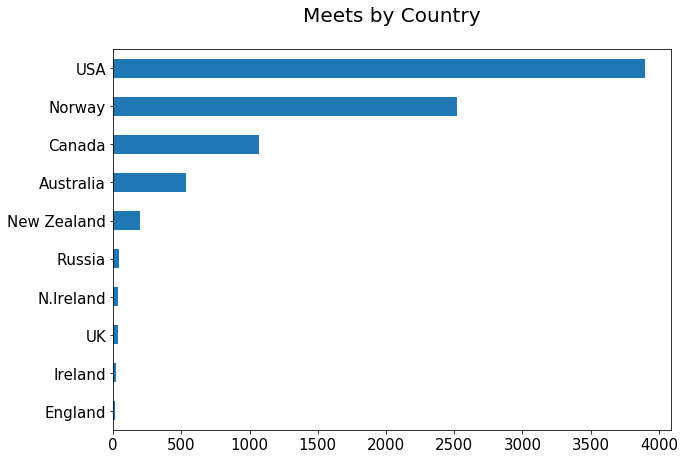

Meets by Country:

USA            3894
Norway         2521
Canada         1066
Australia       532
New Zealand     195
Russia           43
N.Ireland        36
UK               34
Ireland          21
England          16
Name: MeetCountry, dtype: int64


In [885]:
plt.figure(figsize=(10,7))
df1['MeetCountry'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Meets by Country\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Meets by Country:\n')
print(df1['MeetCountry'].value_counts()[:10])

U.S.A. is number one. Not too surprising to know Americans have the most meets, considering the population and economy of the United States. However, meets per capita of Norway, Canada, Australia and New Zealand are all higher than the United States.

In [886]:
#Current country populations, as of April 12, 2018

usPop = 325700000
norwayPop = 5230000
canadaPop = 36290000
aussiePop = 24130000
kiwiPop = 4690000


perCapDict = {'United States': len(df1[df1['MeetCountry']=='USA']) / usPop * 100000,
            'Norway': len(df1[df1['MeetCountry']=='Norway']) / norwayPop * 100000,
            'Canada': len(df1[df1['MeetCountry']=='Canada']) / canadaPop * 100000,
            'Australia': len(df1[df1['MeetCountry']=='Australia']) / aussiePop * 100000,
            'New Zealand': len(df1[df1['MeetCountry']=='New Zealand']) / kiwiPop * 100000}

perCapDf = pd.Series(perCapDict)

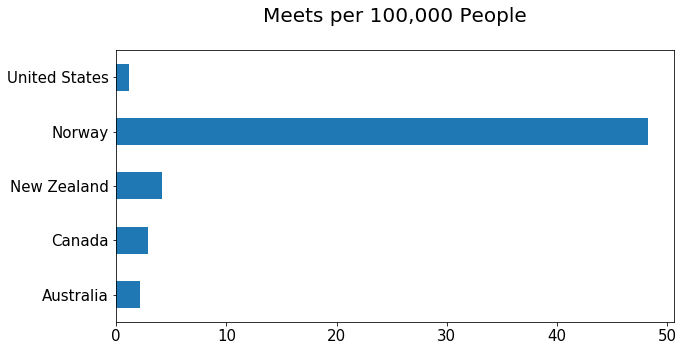

Meets per 100,000 People

United:  1.2
Norway:  48.2
Canada:  2.94
Austra:  2.2
New Ze:  4.16


In [887]:
plt.figure(figsize=(10,5))
perCapDf.plot(kind='barh')
plt.title('Meets per 100,000 People\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Meets per 100,000 People\n')
for k,v in perCapDict.items():
    print(k[:6] + ': ',(round(v,2)))

Wow, Norway really seems to standout as a weightlifting nation! Vikings anyone?

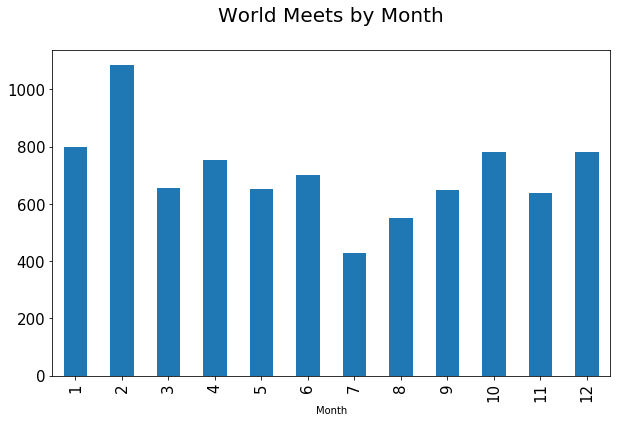

Month
1      800
2     1085
3      656
4      753
5      652
6      702
7      430
8      552
9      650
10     781
11     639
12     782
Name: Month, dtype: int64


In [888]:
plt.figure(figsize=(10,6))
df1.groupby(['Month'])['Month'].count().plot(kind='bar')
plt.title('World Meets by Month\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print(df1.groupby(['Month'])['Month'].count())

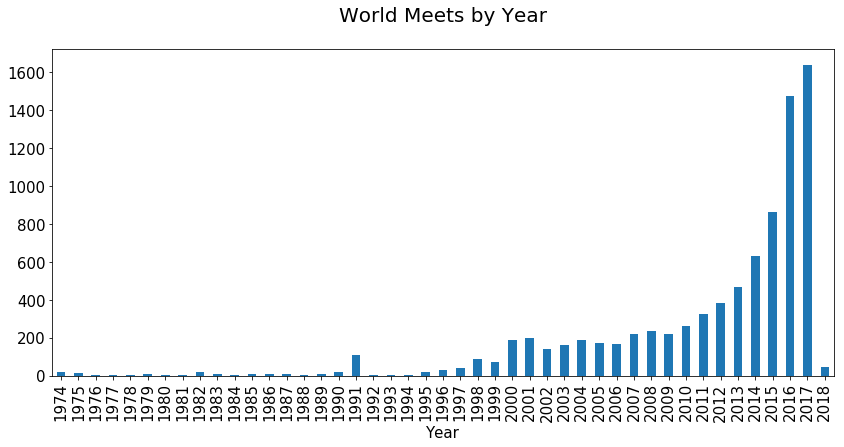

In [889]:
plt.figure(figsize=(14,6))
df1.groupby(['Year'])['Year'].count().plot(kind='bar')
plt.title('World Meets by Year\n',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Seems that weightlifting as a sport has growth considerably.

# Data Cleaning and Processing

In [890]:
df = pd.read_csv('openpowerlifting.csv')

In [891]:
df.shape

(386414, 17)

In [892]:
df.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


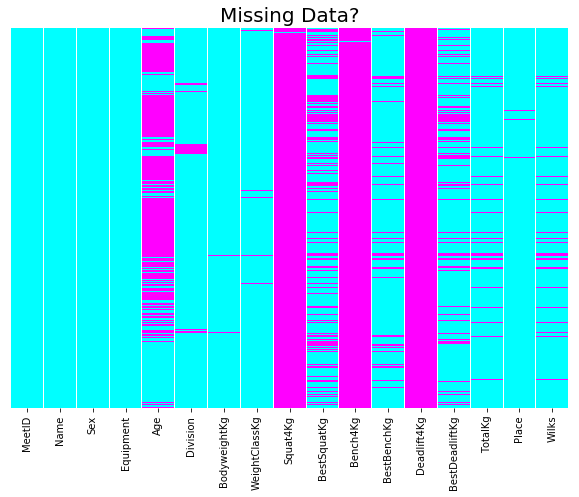

In [893]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cmap='cool',cbar=False,yticklabels=False)
plt.title('Missing Data?',fontsize=20)
plt.show()

The '4Kg' columns look incomplete. Age also looks pretty patchy. Going to drop the '4Kg' columns but keep the 'Age column.

In [894]:
df.drop(['Squat4Kg','Bench4Kg','Deadlift4Kg'],axis=1,inplace=True)

In [895]:
df.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,47.63,20.41,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,142.88,95.25,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,95.25,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,31.75,90.72,122.47,1,130.47


In [896]:
df['Name'].value_counts()[:10]

Sverre Paulsen              183
Alan Aerts                  152
Bjørn Grønvold              144
Per Ove Sjøl                116
Bonnie Aerts                113
Truls Kristensen            106
Thomas Puzicha              105
Leif Sydengen               105
Vidar Alexander Ringvold    104
Birger Sundstøl             104
Name: Name, dtype: int64

There doesn't seem to be a good column in the openpowerlifting.csv dataset to use for eliminating duplicate data. For example, notice that the most unique column, Name, has nearly 200 instances of 'Sverre Paulsen'. And that is not to say that we are talking about the same single person, though we probably are.

# More Processing

In [897]:
print('Number of unique divisions: ' + str(df['Division'].nunique()))

Number of unique divisions: 4246


There seems to be too many unique Divisions to effectively group the data by the Division column. Maybe manually grouping the data by other criterion would work better.

## Classing by Age

Considering how many null values are in the 'Age' column, it probably isn't worth creating a new column to classify lifter's by age. Whatever, it is good practice and I'm going to do it anyway.

Classifying by the lifter's ages offically seems a little more confusing. This is the offical age classification according to the IWF:

http://www.iwf.net/weightlifting_/participants/

- YOUTH: 13 – 17 years of age
- JUNIOR: 15 – 20 years of age
- SENIOR: ≥15 years of age
- MASTERS: ≥35 years of age

This is confusing because a 16 year old can compete as a YOUTH, JUNIOR and SENIOR (though probably only one at a time, and with other unknown criterion)! For lack of better understanding, I will create a classification system that reads as such...

- CHILD: < 13 years of age
- YOUTH: 13 – 17 years of age
- ADULT: 18 - 34 years of age
- MASTERS: ≥35 years of age

In [898]:
def age_class(x):
    if x < 13:
        return 'CHILD'
    if x >= 13 and x <= 17:
        return 'YOUTH'
    if x >= 18 and x <= 34:
        return 'ADULT'
    if x >= 35:
        return 'MASTERS'

In [899]:
df['AgeClass'] = df['Age'].apply(age_class)

## Relative Strength - The Bodyweight Multiplier

As you will see, lifters that weigh more tend to lift more too. I will create a few more columns that reflect how many times a weightlifter can lift his/her own weight. The formula is simply... 

BestliftKg / body weight = lift / BW

By seeing how many times a lifter can lift his/her own weight, we will get another sense of someone's strength. 

In [900]:
def squatBody(x):
    return x['BestSquatKg'] / x['BodyweightKg']

def benchBody(x):
    return x['BestBenchKg'] / x['BodyweightKg']

def deadliftBody(x):
    return x['BestDeadliftKg'] / x['BodyweightKg']

def totalLiftBody(x):
    return x['TotalKg'] / x['BodyweightKg']

In [901]:
df['Squat / BW'] = df.apply(squatBody,axis=1)
df['Bench / BW'] = df.apply(benchBody,axis=1)
df['Deadlift / BW'] = df.apply(deadliftBody,axis=1)
df['Total / BW'] = df.apply(totalLiftBody,axis=1)

## Bodyweight Classing by Sex

Let's make a division by weight. These are the [weight classes](https://en.wikipedia.org/wiki/Olympic_weightlifting#Weight_classes) according to the International Weightlifting Federation. Please note: the IWF focuses mostly on olypmic-style weightlifting, which consists of the [snatch](https://www.youtube.com/watch?v=UBc5N_-xdqo), [clean](https://www.youtube.com/watch?v=_3WeR9NdflI), and [clean and jerk](https://www.youtube.com/watch?v=9HyWjAk7fhY). This dataset doesn't have those lifts, and instead has the [squat](https://www.youtube.com/watch?v=Dy28eq2PjcM), [bench](https://www.youtube.com/watch?v=gRVjAtPip0Y) and [deadlift](https://www.youtube.com/watch?v=-4qRntuXBSc). I'm sure someone really into the sport is outraged that I am combining IWF classes with lifts not typically associated with the IWF. Please for give me :) 


Men Weight Classes

- 56 kg (123 lb)
- 62 kg (137 lb)
- 69 kg (152 lb)
- 77 kg (170 lb)
- 85 kg (187 lb)
- 94 kg (207 lb)
- 105 kg (231 lb)
- 105 kg and over (231 lb+)

Women Weight Classes

- 48 kg (106 lb)
- 53 kg (117 lb)
- 58 kg (128 lb)
- 63 kg (139 lb)
- 69 kg (152 lb)
- 75 kg (165 lb)
- 90 kg (198 lb)
- 90 kg and over (198 lb+)[1]

In [902]:
male = df[df['Sex']=='M']
female = df[df['Sex']=='F']

In [903]:
def male_weight_class(x):
    if x <= 56:
        return '56 Kg'
    if x <= 62 and x > 56:
        return '62 Kg'
    if x <= 69 and x > 62:
        return '69 Kg'
    if x <= 77 and x > 69:
        return '77 Kg'
    if x <= 85 and x > 77:
        return '85 Kg'
    if x <= 94 and x > 85:
        return '94 Kg'
    if x <= 105 and x > 94:
        return '105 Kg'
    if x > 105:
        return '105+ Kg'
        
def female_weight_class(x):
    if x <= 48:
        return '48 Kg'
    if x <= 53 and x > 48:
        return '53 Kg'
    if x <= 58 and x > 53:
        return '58 Kg'
    if x <= 63 and x > 58:
        return '63 Kg'
    if x <= 69 and x > 63:
        return '69 Kg'
    if x <= 75 and x > 69:
        return '75 Kg'
    if x <= 90 and x > 75:
        return '90 Kg'
    if x > 90:
        return '90+ Kg'

In [904]:
male['WeightClassKg'] = male['BodyweightKg'].apply(male_weight_class)
female['WeightClassKg'] = female['BodyweightKg'].apply(female_weight_class)

/Users/julio0703/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/julio0703/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [905]:
df = pd.concat([male,female])

## Negative lifts?

In [906]:
df[df['BestBenchKg']<0].head(3)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks,AgeClass,Squat / BW,Bench / BW,Deadlift / BW,Total / BW
15947,253,Mike Walper,M,Raw,29.0,Open Men,97.9,105 Kg,185.0,-140.0,235.0,NaN,DQ,NaN,ADULT,1.889683,-1.430031,2.400409,NaN
15959,253,Roberto Villalta,M,Raw,NaN,Open Men,110.0,105+ Kg,NaN,-205.0,NaN,NaN,DQ,NaN,None,NaN,-1.863636,NaN,NaN
16035,255,Kyle Harrison,M,Raw,24.0,Open,95.6,105 Kg,192.5,-130.0,255.0,NaN,DQ,NaN,ADULT,2.013598,-1.359833,2.667364,NaN


A [negative](https://www.youtube.com/watch?v=rvY-fR82oPo) in weightlifting is when you apply resistance to the weight as gravity brings it down. So as you lower the weight, you apply controlled resistance to the weight over time (normally three seconds) until it comes down, and then drive the weight back up. This kind of training is normally done on lighter weights and is said to have strength benefits.

However, I don't believe competitions to include negative lifts by just documenting a negative number instead of a positive number. Is this something that I should just drop, apply a function that inserts a Nan value for the nevative values?

In [907]:
negative_lifts = len(df[(df['BestBenchKg']<0) | (df['BestDeadliftKg']<0) | (df['BestSquatKg']<0)]) / len(df)

print('Percent chance of one or more lift values to be negative: {}%'.format(negative_lifts*100))

Percent chance of one or more lift values to be negative: 0.7554074127748994%


Considering how much work it would be to convert all the negative lifts into Nan values, recalculate the 'TotalKg' values and the 'Wilks' values too... I would rather just drop those values, seeing that less than 1% of the dataframe is effected by this glitch.

In [908]:
#Make sure to only drop negatives. We want to keep NaN values.

df = df[(df['BestSquatKg'] > 0) | (df['BestSquatKg'].isnull() == True)]
df = df[(df['BestDeadliftKg'] > 0) | (df['BestDeadliftKg'].isnull() == True)]
df = df[(df['BestBenchKg'] > 0) | (df['BestBenchKg'].isnull() == True)]

# Simple Exploratory Data Analysis

This section is self explaintory. We will only review a variable or two at a time here. Some of the variables will include gender, bodyweight, age and equipment. We are just getting a feel for the data here. We won't look into overall strength measures until later. 

## Gender

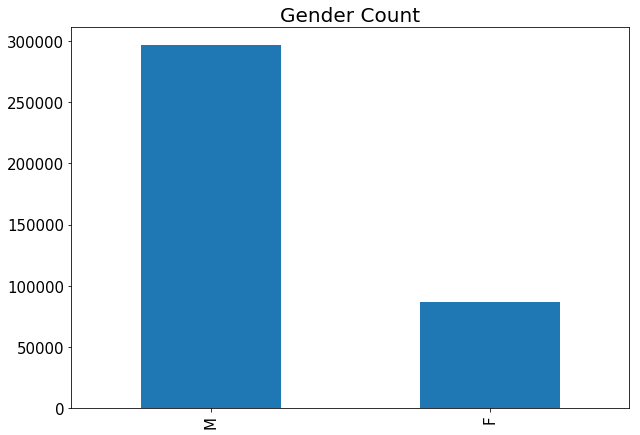

Percentage of Male lifters: 77%

M    296647
F     86848
Name: Sex, dtype: int64


In [910]:
plt.figure(figsize=(10,7))
df['Sex'].value_counts().plot(kind='bar')
plt.title('Gender Count',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print('Percentage of Male lifters: {}%\n'.format(round(len(df[df['Sex']=='M'])/len(df)*100),4))
print(df['Sex'].value_counts())

This isn't very surprising. Males make up around 77% of the data.

## Equipment

In [911]:
print(df['Equipment'].value_counts())

Raw           184856
Single-ply    143600
Wraps          45608
Multi-ply       9424
Straps             7
Name: Equipment, dtype: int64


Since Straps and Wraps appear to be the same thing, let's just combine Straps into Wraps. Here is a great [article](https://barbend.com/raw-vs-equipped-powerlifting/) about the differences between raw lifting and ply lifting. 

In [912]:
#Convert all 'Straps' instances into 'Wraps' instances.

def convert_equipment(x):
    if x == 'Straps':
        return 'Wraps'
    return x

In [913]:
df['Equipment'] = df['Equipment'].apply(convert_equipment)

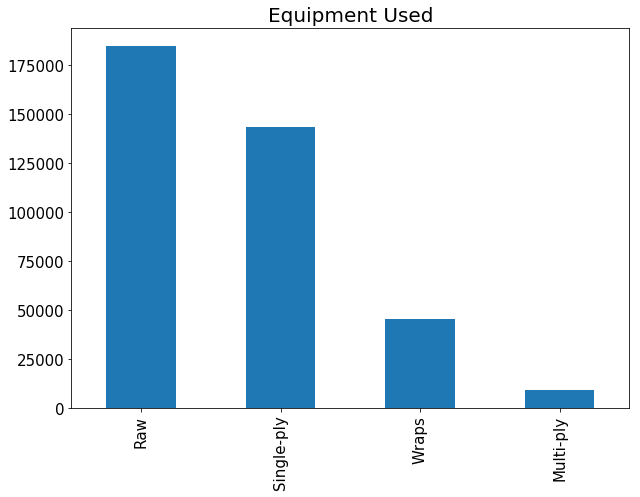

Equipment used: 

Raw           184856
Single-ply    143600
Wraps          45615
Multi-ply       9424
Name: Equipment, dtype: int64


In [914]:
plt.figure(figsize=(10,7))
df['Equipment'].value_counts().plot(kind='bar')
plt.title('Equipment Used',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print('Equipment used: \n')
print(df['Equipment'].value_counts())

# Age

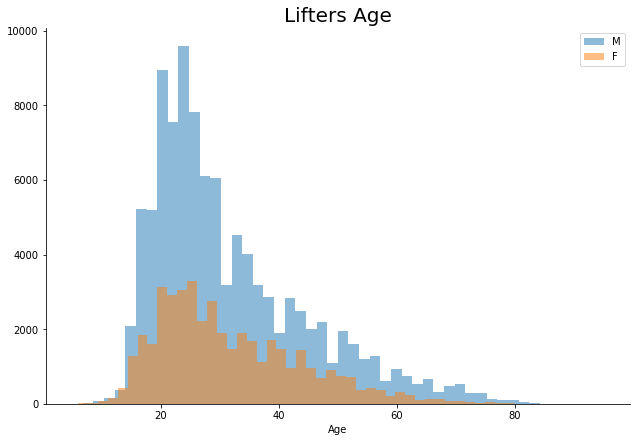

In [915]:
g = sns.FacetGrid(df,hue='Sex',size=6,aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Age',bins=50,alpha=.5)
plt.title('Lifters Age',fontsize=20)
plt.legend(loc=1)
plt.show()

Seems that were are quite a few lifters under the age of 15 and over the age of 80. Let's see some mins and maxs.

In [916]:
df[df['Age']==5]

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks,AgeClass,Squat / BW,Bench / BW,Deadlift / BW,Total / BW
1018,16,Matthew Martinez,M,Raw,5.0,Y5,30.00,56 Kg,NaN,NaN,25.0,25.0,1,51.17,CHILD,NaN,NaN,0.833333,0.833333
236166,6445,Madden Meek,M,Raw,5.0,M-T,36.29,56 Kg,NaN,NaN,40.0,40.0,5,60.99,CHILD,NaN,NaN,1.102232,1.102232


In [917]:
df[df['Age']==95]

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks,AgeClass,Squat / BW,Bench / BW,Deadlift / BW,Total / BW
1087,19,John Gilmour,M,Raw,95.0,RLM 95-99,90.0,94 Kg,NaN,75.0,NaN,75.0,1,47.88,MASTERS,NaN,0.833333,NaN,0.833333
1088,19,John Gilmour,M,Raw,95.0,RM 95-99,90.0,94 Kg,NaN,75.0,NaN,75.0,1,47.88,MASTERS,NaN,0.833333,NaN,0.833333


Couple of young boys at the age of 5. Notice that these young boys only did one lift, which was the deadlift. Hmmm. 

Incredible!! There are a couple of men lifting at the age of 95. Also, notice that these older men only did the Bench. Hmmm.

I assume the reason for this is safety. 

## Bodyweight

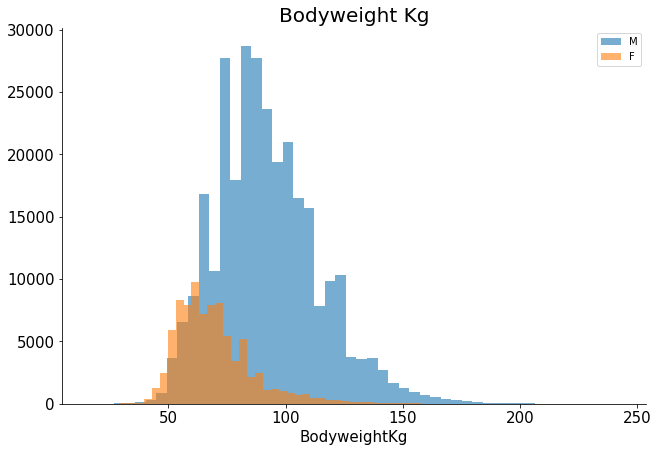

In [918]:
g = sns.FacetGrid(df,hue='Sex',size=6,aspect=1.5,legend_out=True)
g = g.map(plt.hist,'BodyweightKg',bins=50,alpha=.6)
plt.title('Bodyweight Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.legend(loc=1)
plt.show()

Male weightlifters are heavier then female weightlifters, according to this histogram. 

# Absolute Strength

Absolute strength is simply most weight lifted. In this section we'll look at absolute strength by bodyweight and equipment and absolute strength by gender.

## Absolute Strength by Bodyweight and Equipment 

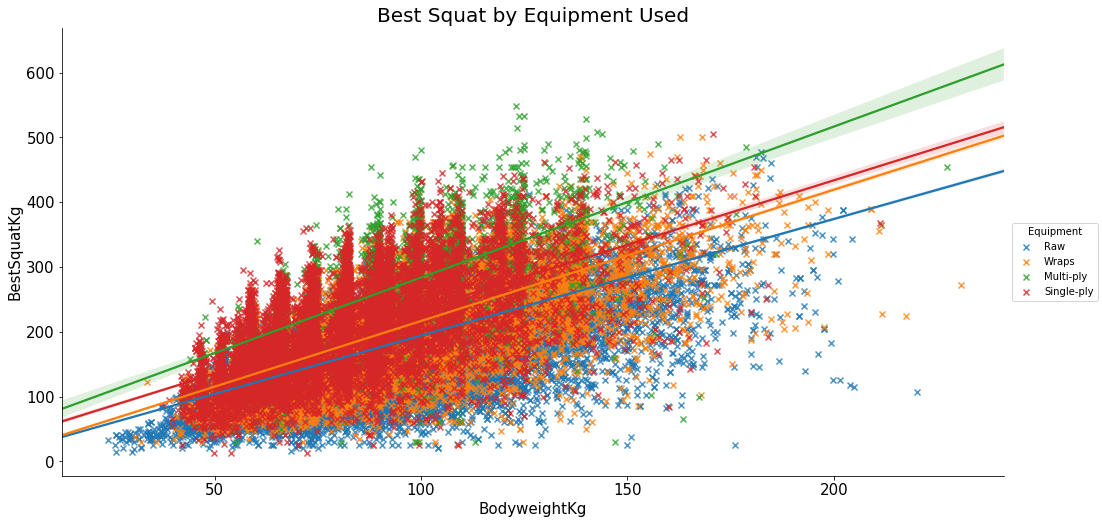

Equipment Used by Lifters:

Raw           184856
Single-ply    143600
Wraps          45615
Multi-ply       9424
Name: Equipment, dtype: int64


In [919]:
sns.lmplot(x='BodyweightKg',
           y='BestSquatKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           size=7,
           aspect=2)
plt.title('Best Squat by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('BestSquatKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

Multi-ply users had a significate increase in squat performance. Single-ply only slightly better than wraps. Raw lifters on average performed last in the squat. Notice the positive correlation between Bodyweight and BestSquatKg.

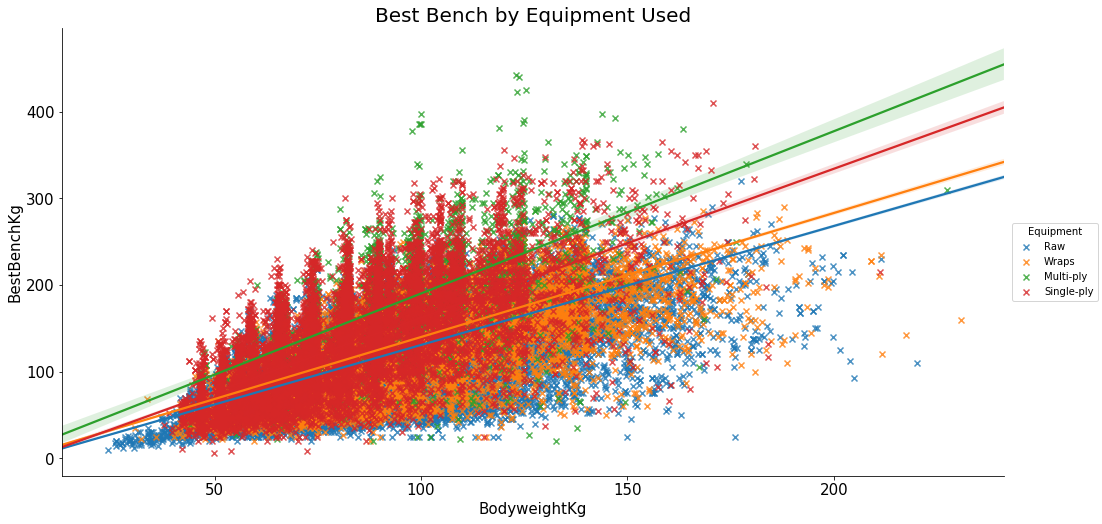

Equipment Used by Lifters:

Raw           184856
Single-ply    143600
Wraps          45615
Multi-ply       9424
Name: Equipment, dtype: int64


In [920]:
sns.lmplot(x='BodyweightKg',
           y='BestBenchKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           size=7,
           aspect=2)
plt.title('Best Bench by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('BestBenchKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

Once again, multi-ply on the top, single-ply second and raw, along with wraps, on the bottom. Notice the positive correlation between Bodyweight and BestBenchKg.

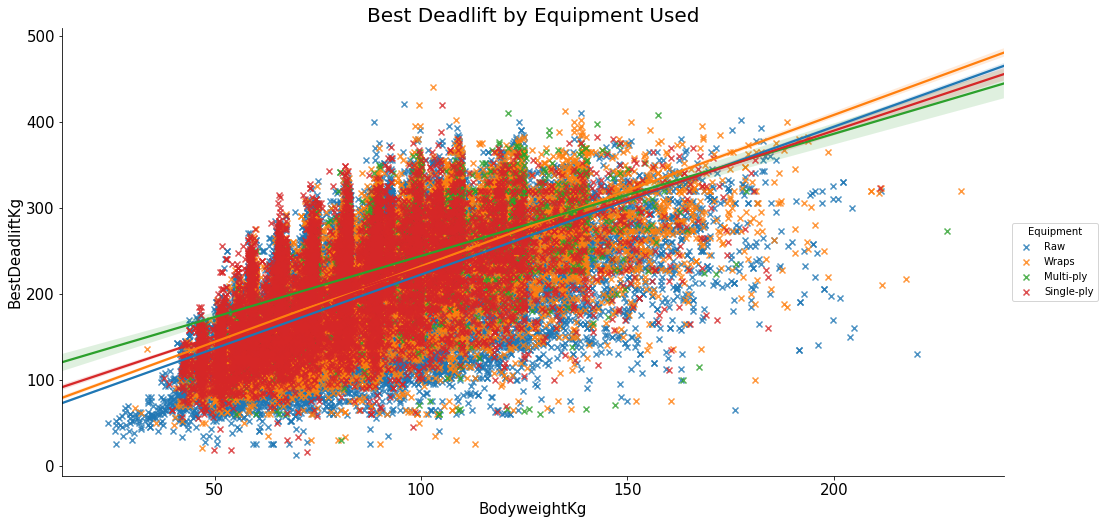

Equipment Used by Lifters:

Raw           184856
Single-ply    143600
Wraps          45615
Multi-ply       9424
Name: Equipment, dtype: int64


In [921]:
sns.lmplot(x='BodyweightKg',
           y='BestDeadliftKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           size=7,
           aspect=2)
plt.title('Best Deadlift by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('BestDeadliftKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

Finally something juicy!! Though all of the regression lines are close together, wraps and raw barely out perform single-ply and multi-ply. I would imagine that since wraps performed best, that sometimes the weakest link when deadlifting is your grip of the bar. Interesting. Also, notice the positive correlation between Bodyweight and BestDeadliftKg.

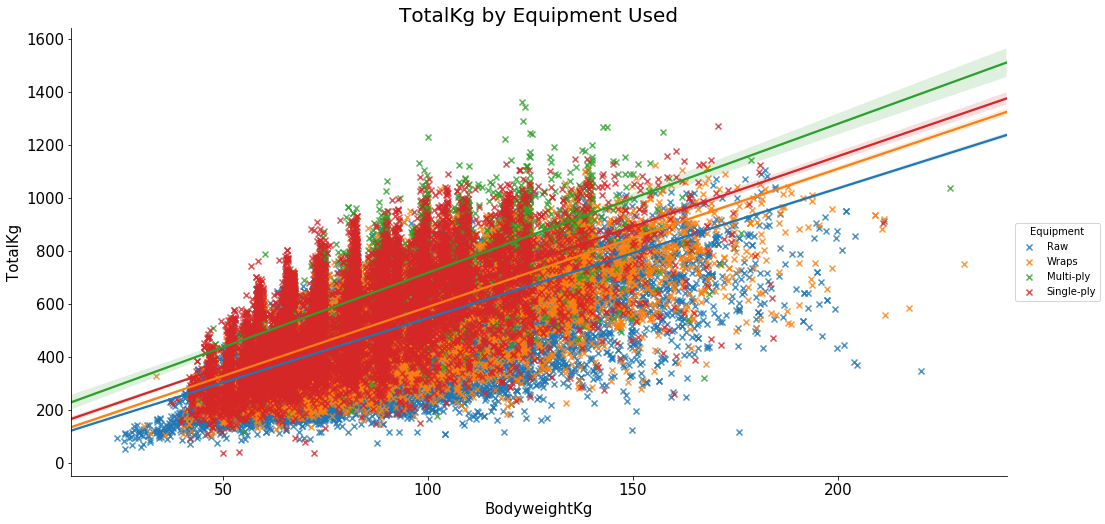

Equipment Used by Lifters:

Raw           184856
Single-ply    143600
Wraps          45615
Multi-ply       9424
Name: Equipment, dtype: int64


In [922]:
sns.lmplot(x='BodyweightKg',
           y='TotalKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           size=7,
           aspect=2)
plt.title('TotalKg by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('TotalKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

Not surprising, this chart looks a lot like the bench and squat charts. Multi-ply is the best, followed by single-ply, grips and raw in that order. Notice the positive correlation between Bodyweight and TotalKg.

## Absolute Strength by Sex

Absolute strenght is simily the amount of weight lifted, regardless of the bodyweight of the lifter.

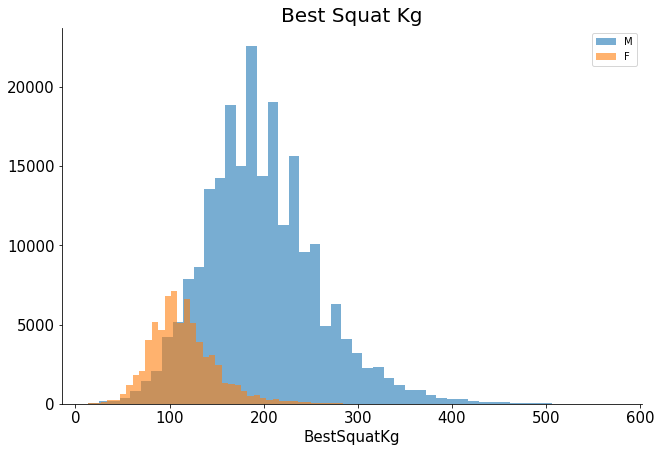

In [923]:
g = sns.FacetGrid(df,hue='Sex',size=6,aspect=1.5,legend_out=True)
g = g.map(plt.hist,'BestSquatKg',bins=50,alpha=.6)
plt.title('Best Squat Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('BestSquatKg',fontsize=15)
plt.legend(loc=1)
plt.show()

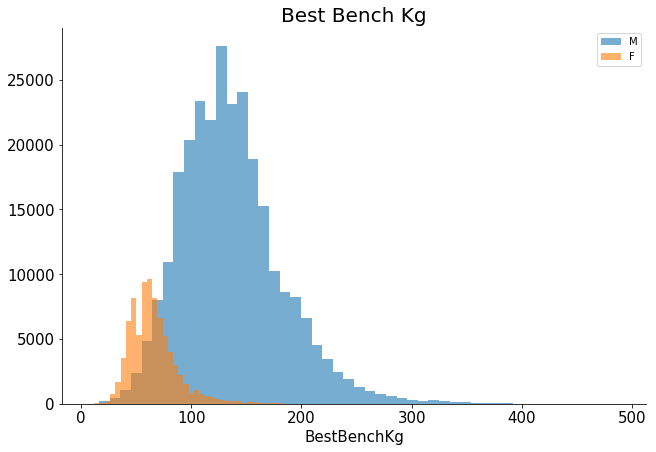

In [924]:
g = sns.FacetGrid(df,hue='Sex',size=6,aspect=1.5,legend_out=True)
g = g.map(plt.hist,'BestBenchKg',bins=50,alpha=.6)
plt.title('Best Bench Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('BestBenchKg',fontsize=15)
plt.legend(loc=1)
plt.show()

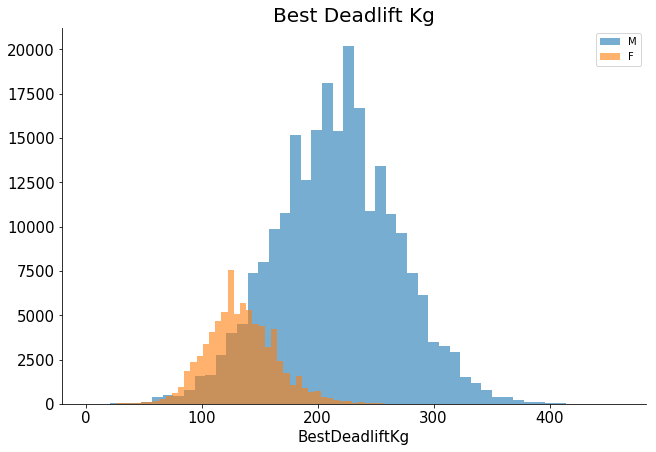

In [925]:
g = sns.FacetGrid(df,hue='Sex',size=6,aspect=1.5,legend_out=True)
g = g.map(plt.hist,'BestDeadliftKg',bins=50,alpha=.6)
plt.title('Best Deadlift Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('BestDeadliftKg',fontsize=15)
plt.legend(loc=1)
plt.show()

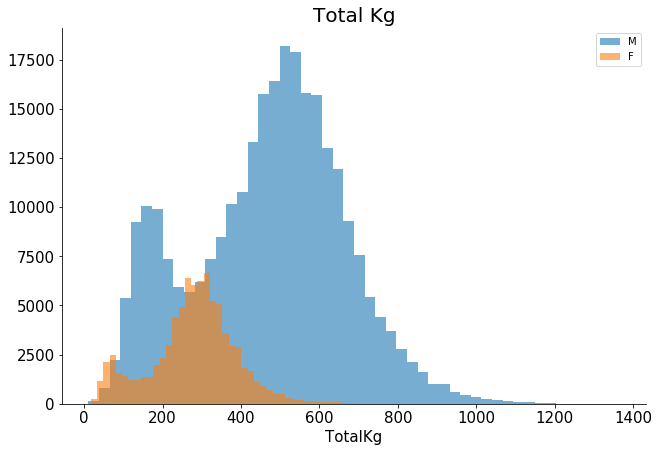

In [926]:
g = sns.FacetGrid(df,hue='Sex',size=6,aspect=1.5,legend_out=True)
g = g.map(plt.hist,'TotalKg',bins=50,alpha=.6)
plt.title('Total Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('TotalKg',fontsize=15)
plt.legend(loc=1)
plt.show()

A few things here. 
- We are reminded that weightlifting is a man's sport. 
- All genders' graphs resemble a normal distribution.
- The female outliers are comparable to men on the bottom, but not on the top.

Questions.
- Do males lift more because they are heavier, or because men are just physically stronger?

# Relative Strength

Relative strength, by this measurement, will be how many times can an athlete lift their own bodyweight on a particular lift. First we will look at the overall score by gender and second look at outliers. 

## Relative Strength by Sex

Relative strenght is weight lifted divided by the bodyweight of the lifter. Using the multiplier will show who is strongest by bodyweight.

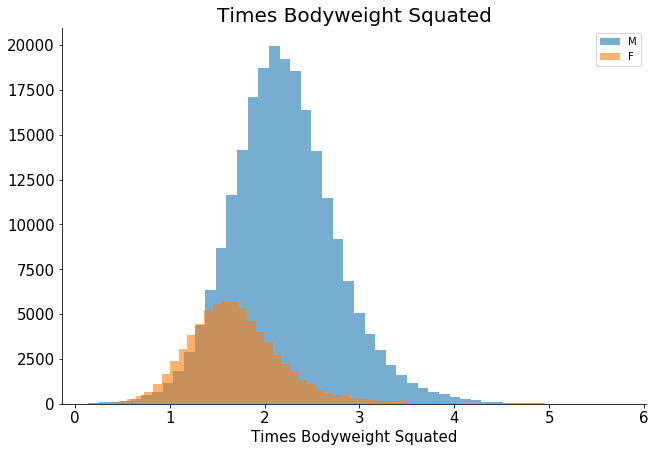

In [927]:
g = sns.FacetGrid(df,hue='Sex',size=6,aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Squat / BW',bins=50,alpha=.6)
plt.title('Times Bodyweight Squated',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Times Bodyweight Squated',fontsize=15)
plt.legend(loc=1)
plt.show()

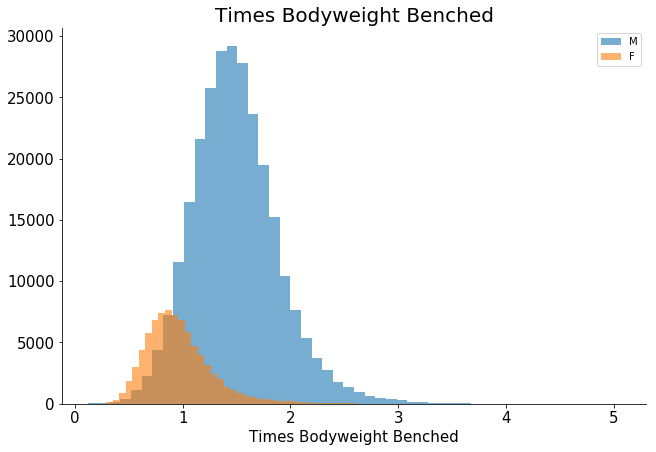

In [928]:
g = sns.FacetGrid(df,hue='Sex',size=6,aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Bench / BW',bins=50,alpha=.6)
plt.title('Times Bodyweight Benched',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Times Bodyweight Benched',fontsize=15)
plt.legend(loc=1)
plt.show()

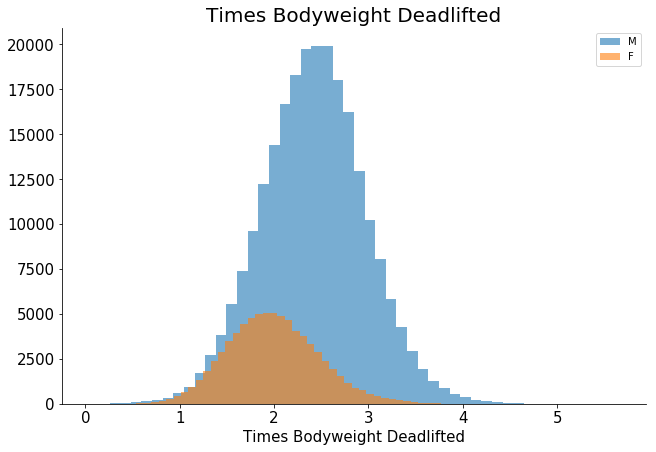

In [929]:
g = sns.FacetGrid(df,hue='Sex',size=6,aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Deadlift / BW',bins=50,alpha=.6)
plt.title('Times Bodyweight Deadlifted',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Times Bodyweight Deadlifted',fontsize=15)
plt.legend(loc=1)
plt.show()

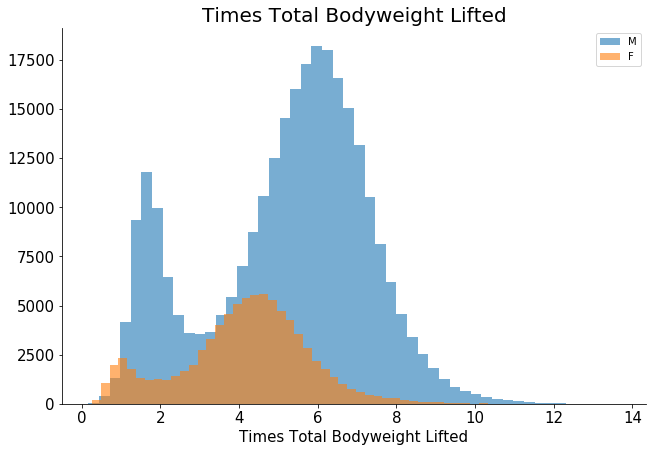

In [930]:
g = sns.FacetGrid(df,hue='Sex',size=6,aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Total / BW',bins=50,alpha=.6)
plt.title('Times Total Bodyweight Lifted',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Times Total Bodyweight Lifted',fontsize=15)
plt.legend(loc=1)
plt.show()

Males seem to be stronger than Females relative to their bodyweights too. The histogram seems to be a little more to the left for females on the bench histogram. I am sure there is an anatomical explanation for this. 

## Squat by Bodyweight

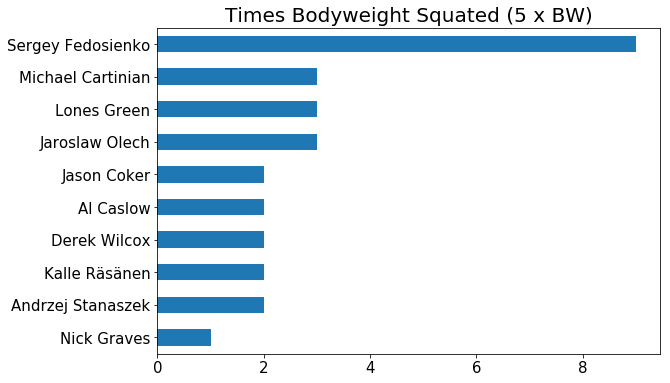

Sergey Fedosienko    9
Jaroslaw Olech       3
Lones Green          3
Michael Cartinian    3
Andrzej Stanaszek    2
Kalle Räsänen        2
Derek Wilcox         2
Al Caslow            2
Jason Coker          2
Nick Graves          1
Name: Name, dtype: int64


In [931]:
plt.figure(figsize=(9,6))
df[df['Squat / BW']>=5]['Name'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Times Bodyweight Squated (5 x BW)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print(df[df['Squat / BW']>=5]['Name'].value_counts()[:10])

## Bench by Bodyweight

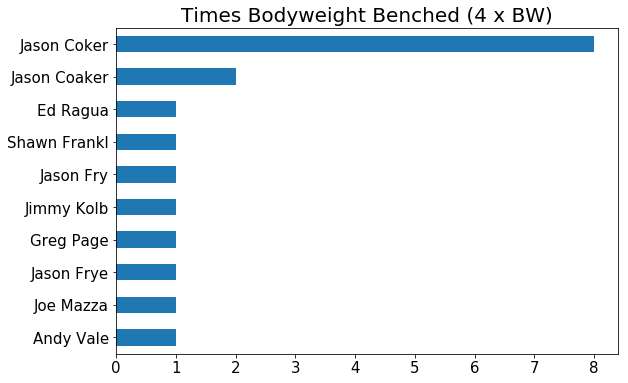

Jason Coker     8
Jason Coaker    2
Andy Vale       1
Joe Mazza       1
Jason Frye      1
Greg Page       1
Jimmy Kolb      1
Jason Fry       1
Shawn Frankl    1
Ed Ragua        1
Name: Name, dtype: int64


In [932]:
plt.figure(figsize=(9,6))
df[df['Bench / BW']>=4]['Name'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Times Bodyweight Benched (4 x BW)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print(df[df['Bench / BW']>=4]['Name'].value_counts()[:10])

Watch [Jason Coker](https://www.youtube.com/watch?v=O2zKtvwsIRA) bench a lot of weight.

## Deadlift by Bodyweight

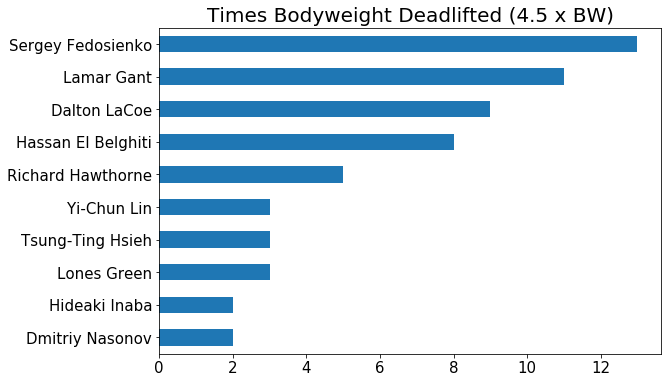

Sergey Fedosienko     13
Lamar Gant            11
Dalton LaCoe           9
Hassan El Belghiti     8
Richard Hawthorne      5
Lones Green            3
Tsung-Ting Hsieh       3
Yi-Chun Lin            3
Dmitriy Nasonov        2
Hideaki Inaba          2
Name: Name, dtype: int64


In [933]:
plt.figure(figsize=(9,6))
df[df['Deadlift / BW']>=4.5]['Name'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Times Bodyweight Deadlifted (4.5 x BW)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print(df[df['Deadlift / BW']>=4.5]['Name'].value_counts()[:10])

In [934]:
df[df['Deadlift / BW']>=5]

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks,AgeClass,Squat / BW,Bench / BW,Deadlift / BW,Total / BW
64950,1479,Lamar Gant,M,Single-ply,NaN,NaN,56.0,56 Kg,190.0,140.0,280.0,610.0,1,555.31,None,3.392857,2.500000,5.000000,10.892857
66257,1492,Lamar Gant,M,Single-ply,NaN,NaN,60.0,62 Kg,235.0,140.0,302.5,677.5,1,577.82,None,3.916667,2.333333,5.041667,11.291667
305201,7370,Tanner Debrane,M,Single-ply,NaN,O,34.0,56 Kg,NaN,112.5,192.5,305.0,1,511.50,None,NaN,3.308824,5.661765,8.970588
381083,8436,Lamar Gant,M,Single-ply,NaN,NaN,60.0,62 Kg,242.5,140.0,300.0,682.5,1,582.09,None,4.041667,2.333333,5.000000,11.375000
381147,8438,Lamar Gant,M,Single-ply,NaN,NaN,60.0,62 Kg,247.5,140.0,307.5,695.0,1,592.75,None,4.125000,2.333333,5.125000,11.583333


INTERESTING FACT:  [Lamar Gant](https://www.hudsonvalleyscoliosis.com/lamar-gant-scoliosis/) has/had scoliosis! Does it give me an unfair advantage?

## Total by Bodyweight

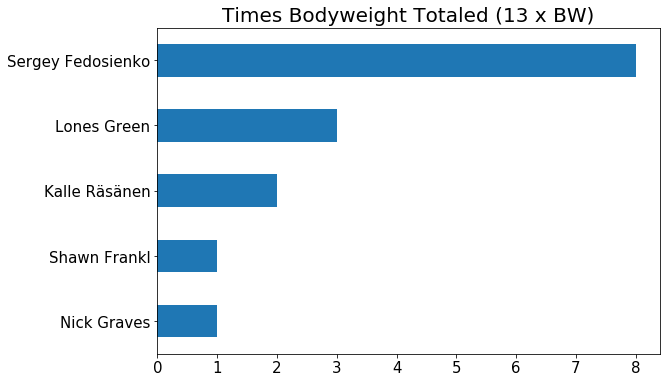

Sergey Fedosienko    8
Lones Green          3
Kalle Räsänen        2
Nick Graves          1
Shawn Frankl         1
Name: Name, dtype: int64


In [935]:
plt.figure(figsize=(9,6))
df[df['Total / BW']>=13]['Name'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Times Bodyweight Totaled (13 x BW)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print(df[df['Total / BW']>=13]['Name'].value_counts()[:10])

Watch [Sergey Fedosienko](https://www.youtube.com/watch?v=Y_8vjRZiDrY) lift a lot of weights here. 

## Relative Strength Flaws

It is obvious why we cannot judge strength by an absolute measurement. For the most part, bigger athletes and lift heavier weights. But does the bodyweight multiplier (strength relative to bodyweight) solve the problem of judging strength across different genders and weight classes? Let's take a visual look.

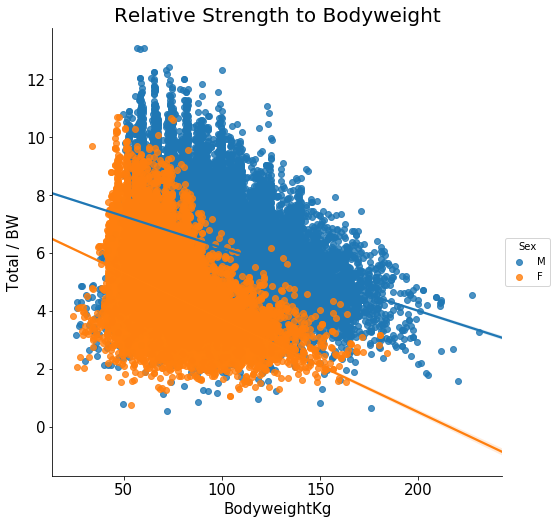

In [942]:
sns.lmplot(data=df.dropna(),
           x='BodyweightKg',
           y='Total / BW',
           hue='Sex',
           size=7)
plt.title('Relative Strength to Bodyweight',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Total / BW',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()

Interesting! It seems that judging overall strength by the bodyweight multiplier massively favors the lighter lifters. The lighter lifters are the ones lifting several more times their bodyweight, way more than the heavier lifters. Is there a natual limit to the strength to bodyweight measurement?

# Wilks

The [Wilks Coefficient](https://en.wikipedia.org/wiki/Wilks_Coefficient) is a formula created by Robert Wilks to compare different sized lifters to each other, claiming that the bodyweight multiplier is flawed and heavy favors lighter lifters, which is true.

Coeff = 500 /
a + bx + cx^2 + dx^3 + ex^4 + fx^5

x  is the body weight of the lifter in kilograms

Values for men are:
- a=-216.0475144
- b=16.2606339
- c=-0.002388645
- d=-0.00113732
- e=7.01863E-06
- f=-1.291E-08

Values for women are:
- a=594.31747775582
- b=-27.23842536447
- c=0.82112226871
- d=-0.00930733913
- e=4.731582E-05
- f=-9.054E-08

The Wilks Coefficient doesn't come without critics though.

In [943]:
df.columns

Index(['MeetID', 'Name', 'Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg',
       'WeightClassKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg',
       'TotalKg', 'Place', 'Wilks', 'AgeClass', 'Squat / BW', 'Bench / BW',
       'Deadlift / BW', 'Total / BW'],
      dtype='object')

In [944]:
df.filter(items=['Name','BodyweightKg','TotalKg','Total / BW','Wilks','Sex'])[df['Sex']=='F'].sort_values(ascending=False,by='Wilks')[:10]

,Name,BodyweightKg,TotalKg,Total / BW,Wilks,Sex
162483,Laura Phelps-Sweatt,75.00,816.47,10.886267,776.17,F
164532,Laura Phelps-Sweatt,74.75,802.86,10.740602,764.83,F
53119,Heidi Howar,59.24,678.12,11.446995,763.55,F
160104,Laura Phelps-Sweatt,75.00,796.05,10.614000,756.76,F
162405,Laura Phelps-Sweatt,73.94,787.50,10.650527,755.41,F
159000,Laura Phelps-Sweatt,74.84,780.18,10.424639,742.66,F
156240,Rheta West,65.68,709.87,10.808009,739.03,F
386161,Rheta West,66.04,712.14,10.783465,738.43,F
53718,Laura Phelps-Sweatt,66.27,709.87,10.711785,734.21,F
158866,Laura Phelps-Sweatt,82.50,802.87,9.731758,722.56,F


In [945]:
df.filter(items=['Name','BodyweightKg','TotalKg','Total / BW','Wilks','Sex'])[df['Sex']=='M'].sort_values(ascending=False,by='Wilks')[:10]

,Name,BodyweightKg,TotalKg,Total / BW,Wilks,Sex
53198,Dave Hoff,122.97,1363.05,11.084411,779.38,M
57011,Dave Hoff,131.09,1365.31,10.415058,771.07,M
164936,Dave Hoff,123.79,1342.63,10.846030,766.63,M
163054,Dave Hoff,126.55,1342.63,10.609482,763.22,M
159715,Shawn Frankl,90.00,1192.95,13.255000,761.57,M
55694,Dave Hoff,129.27,1344.90,10.403806,761.44,M
164547,Dave Hoff,124.83,1322.22,10.592165,753.67,M
53735,Dave Hoff,126.19,1324.49,10.495998,753.33,M
162475,Dave Hoff,125.00,1319.95,10.559600,752.17,M
48231,Kalle Räsänen,89.80,1175.00,13.084633,750.96,M


In [946]:
wilksByName = df.filter(['Name','Sex','BodyweightKg','WeightClassKg','Wilks']).sort_values(ascending=False,by='Wilks')

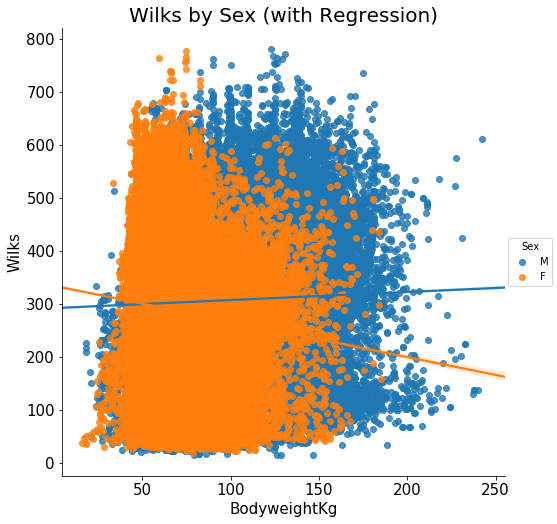

In [957]:
sns.lmplot(x = 'BodyweightKg',
           y = 'Wilks',
           data = wilksByName.dropna(),
           hue = 'Sex',
           size=7)
plt.title('Wilks by Sex (with Regression)',fontsize=20)
plt.xlabel('BodyweightKg',fontsize=15)
plt.ylabel('Wilks',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Do lighter females have a overall advantage over heavier females?

Does the Wilk's coefficient do a good job of comparing lifters of different classes and sexes?

# Allometric Scaling

[Allometric scaling](https://en.wikipedia.org/wiki/Allometry#Allometric_scaling) is a scaling method that calculates specific charateristics (strength) based on a change in size (BodyweightKg). That is to say, by how much does a particular characteristic increase or decrease (i.e. metabolism or strength) in relation to size (mass, length or height) of the organism?  

Below is an interesting formula that I found in an [interesting article](https://www.strongerbyscience.com/whos-the-most-impressive-powerlifter/). 

allometric strength score = S * M ^ -2/3

s = lift

m = bodyweight

Let's take the allometric scale function and apply it to the given lifts to find the lift's allometric score. After we find the lift's allometric score, we will see how is fairs to the Wilks Coefficient. 

In [948]:
def allometric_scale_squat(x):
    return x['BestSquatKg'] * x['BodyweightKg'] ** (-2/3)

def allometric_scale_bench(x):
    return x['BestBenchKg'] * x['BodyweightKg'] ** (-2/3)

def allometric_scale_deadlift(x):
    return x['BestDeadliftKg'] * x['BodyweightKg'] ** (-2/3)

def allometric_scale_total(x):
    return x['TotalKg'] * x['BodyweightKg'] ** (-2/3)

In [949]:
df['SquatAllometric'] = df.apply(allometric_scale_squat,axis=1)
df['BenchAllometric'] = df.apply(allometric_scale_bench,axis=1)
df['DeadliftAllometric'] = df.apply(allometric_scale_deadlift,axis=1)
df['TotalAllometric'] = df.apply(allometric_scale_total,axis=1)

## Wilks v Allometric

In [950]:
df.filter(items=['Name','BodyweightKg','TotalKg','Total / BW','Wilks','TotalAllometric','Sex'])[df['Sex']=='F'].sort_values(ascending=False,by='TotalAllometric')[:10]

,Name,BodyweightKg,TotalKg,Total / BW,Wilks,TotalAllometric,Sex
162483,Laura Phelps-Sweatt,75.00,816.47,10.886267,776.17,45.909165,F
164532,Laura Phelps-Sweatt,74.75,802.86,10.740602,764.83,45.244489,F
160104,Laura Phelps-Sweatt,75.00,796.05,10.614000,756.76,44.760972,F
162405,Laura Phelps-Sweatt,73.94,787.50,10.650527,755.41,44.702409,F
53119,Heidi Howar,59.24,678.12,11.446995,763.55,44.623454,F
159000,Laura Phelps-Sweatt,74.84,780.18,10.424639,742.66,43.931122,F
156240,Rheta West,65.68,709.87,10.808009,739.03,43.607052,F
386161,Rheta West,66.04,712.14,10.783465,738.43,43.587371,F
53718,Laura Phelps-Sweatt,66.27,709.87,10.711785,734.21,43.347845,F
172787,Rheta West,67.22,705.34,10.493008,722.04,42.664452,F


In [951]:
df.filter(items=['Name','BodyweightKg','TotalKg','Total / BW','Wilks','TotalAllometric','Sex'])[df['Sex']=='M'].sort_values(ascending=False,by='TotalAllometric')[:10]

,Name,BodyweightKg,TotalKg,Total / BW,Wilks,TotalAllometric,Sex
159715,Shawn Frankl,90.00,1192.95,13.255000,761.57,59.401020,M
48231,Kalle Räsänen,89.80,1175.00,13.084633,750.96,58.594067,M
48136,Kalle Räsänen,82.50,1100.00,13.333333,736.90,58.043918,M
160082,Shawn Frankl,100.00,1231.50,12.315000,749.48,57.161166,M
53198,Dave Hoff,122.97,1363.05,11.084411,779.38,55.120397,M
162477,Michael Cartinian,82.50,1043.26,12.645576,698.89,55.049907,M
53729,Jason Coker,88.65,1090.88,12.305471,701.87,54.868677,M
164447,Lones Green,63.19,864.09,13.674474,703.82,54.466158,M
164482,Lones Green,63.19,864.09,13.674474,703.82,54.466158,M
164412,Lones Green,63.19,864.09,13.674474,703.82,54.466158,M


At the top level, there is only one disagreement between the top measuremnts for female lifters. 

In the male category, Shawn Frankl is the winner using the allometric score, while Dave Hoff is the winner by the Wilks Coefficient. This can be a real problem when trying to compare lifters from different weight classes. Who is really stronger? Weightlifting is not like body building where the most beautiful lifter wins. Weightlifting is more about a hard number or calculation, not about aesthetics or style.

## Allometric Visualization

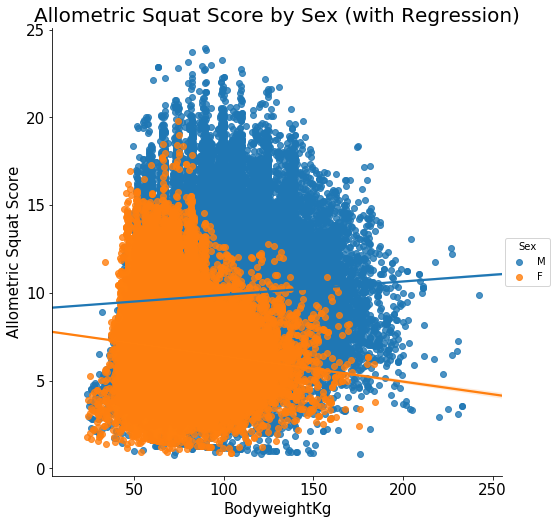

In [953]:
sns.lmplot(x='BodyweightKg',
           y='SquatAllometric',
           data=df,
           hue='Sex',
           size=7)
plt.title('Allometric Squat Score by Sex (with Regression)',fontsize=20)
plt.xlabel('BodyweightKg',fontsize=15)
plt.ylabel('Allometric Squat Score',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

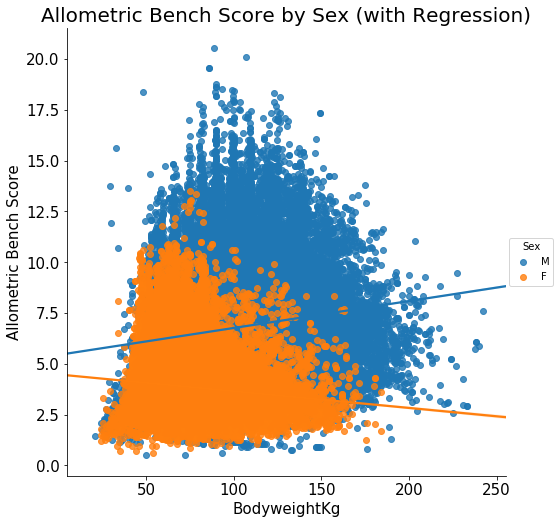

In [954]:
sns.lmplot(x='BodyweightKg',
           y='BenchAllometric',
           data=df,
           hue='Sex',
           size=7)
plt.title('Allometric Bench Score by Sex (with Regression)',fontsize=20)
plt.xlabel('BodyweightKg',fontsize=15)
plt.ylabel('Allometric Bench Score',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

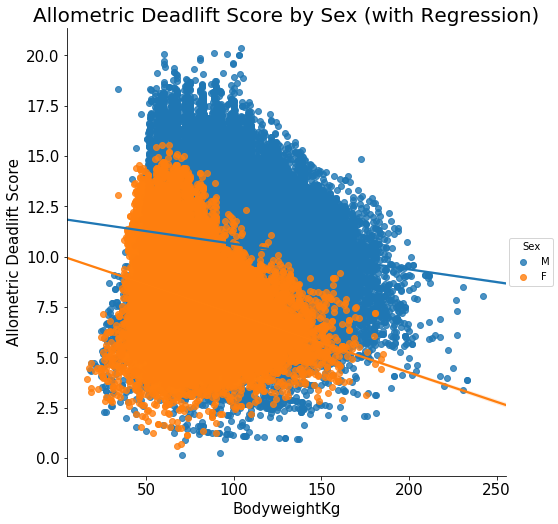

In [955]:
sns.lmplot(x='BodyweightKg',
           y='DeadliftAllometric',
           data=df,
           hue='Sex',
           size=7)
plt.title('Allometric Deadlift Score by Sex (with Regression)',fontsize=20)
plt.xlabel('BodyweightKg',fontsize=15)
plt.ylabel('Allometric Deadlift Score',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

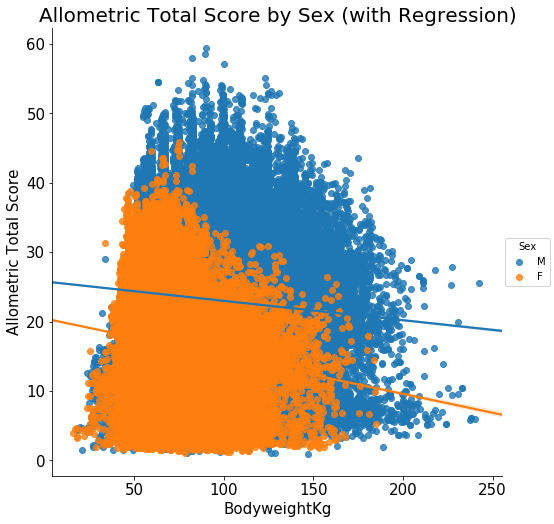

In [956]:
sns.lmplot(x='BodyweightKg',
           y='TotalAllometric',
           data=df,
           hue='Sex',
           size=7)
plt.title('Allometric Total Score by Sex (with Regression)',fontsize=20)
plt.xlabel('BodyweightKg',fontsize=15)
plt.ylabel('Allometric Total Score',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Seems that depending on the lift and sex, the regression line of that particular lift changes by both slope and by correlation. 

# Food for Thought

- Are humans biologically better at some lifts than others? 
- Are Males or Females biologically better at some lifts compared to the other?
- Are the outliers tampering with the results?
- How do you like to judge strength? Absolutely or Relatively? 
- If Relatively, do you prefer the bodyweight multiplier, the Wilks coefficient or the allometric score?

# Thanks for looking. Feedback is appreciated!!!